In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Chile'

link = 'https://rally-base.com/2023/rally-chile-2023/?ssId='
startat, no_ss=7872, int(16) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,8,Tänak Ott,RC1,00:10:16.8,115.39 0.00,00:00:00.0 00:00:00.0,1,Chile,1
2,2,3,Suninen T,RC1,00:10:18.9,115.00 0.11,00:00:02.1 00:00:02.1,1,Chile,2
3,3,33,Evans Elf,RC1,00:10:21.7,114.48 0.25,00:00:04.9 00:00:02.8,1,Chile,3
4,4,7,Loubet P.,RC1,00:10:24.2,114.02 0.37,00:00:07.4 00:00:02.5,1,Chile,4
5,5,69,Rovanperä,RC1,00:10:26.8,113.55 0.51,00:00:10.0 00:00:02.6,1,Chile,5
...,...,...,...,...,...,...,...,...,...,...
32,32,56,Arenas Fe,RC4,00:09:20.5,89.02 9.65,00:02:13.8 00:00:02.9,16,Chile,32
33,33,62,Klein Jav,RC4,00:09:43.2,85.56 11.29,00:02:36.5 00:00:22.7,16,Chile,33
34,34,67,Arce Javi,RC5,00:10:17.4,80.82 13.76,00:03:10.7 00:00:34.2,16,Chile,34
35,35,60,Iglesias,RC4,00:10:37.4,78.28 15.20,00:03:30.7 00:00:20.0,16,Chile,35


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.png'))


In [8]:
rally2023_ClassView

0                          Pos.                                              \
ss                           1   2   3   4   5   6   7   8   9   10  11  12   
No. Crew       Group Race                                                     
3   Suninen  T RC1   Chile    2   5   3   1   3   2   4   4   3   4   2   4   
7   Loubet  P. RC1   Chile    4   3  45  44  44   -   -   -   -   -   -   -   
8   Tänak  Ott RC1   Chile    1   6   2   2   1   1   2   1   1   6   1   1   
11  Neuville   RC1   Chile    6   4   6   3   2   3   5   3   2   3   4   2   
13  Munster  G RC1   Chile   11   8   7   7   6   7   9   9   6   7   8  36   
18  Katsuta  T RC1   Chile    7   7   5   4   7   5   6   5  21   5   6   9   
20  Rossel  Yo RC2   Chile   16  27  15  17  14  14  10   7   5  10   7  11   
21  Pajari  Sa RC2   Chile    9  10   9   8   8   8  22  14   9   9  11  15   
22  Solberg  O RC2   Chile    8  12   8  10  10   9   8  12  14  15  12   6   
23  Greensmith RC2   Chile   13  11  12  13  13  13  12   8   7   8   9   7   
24  Lindholm   RC2   Chile   15  22  13  12  11  11  13  10  11  11  17  14   
25  Kajetanowi RC2   Chile   19  16  14  16  12  12  14  13  10  13  10   8   
26  Gryazin  N RC2   Chile   10  13  11   9  15  15  15  11   4  12  19  12   
27  Bulacia  M RC2   Chile   17  14  16  14  28  42   -   -   -   -   -   -   
28  Heller  Al RC1   Chile   12   9  10  11   9  10   7  17  18  17  13  37   
29  Martínez   RC2   Chile   14  15  21  15  16  41  11  18  15  33  20  10   
30  Fernàndez  RC2   Chile   20  21  22  21  20  19  19  20  16  20  16  38   
31  Bulacia  B RC2   Chile   25  20  26  20  17  16  16  23  22  14  14  38   
32  Zaldivar   RC2   Chile   27  17  18  18  22  20  20  21  19  16  21  29   
33  Evans  Elf RC1   Chile    3   1   1   5   4   4   3   2  13   2   3   3   
34  Heller  Pe RC2   Chile   21  18  20  23  18  21  21  19  17  18  18  16   
35  Rosselot   RC2   Chile   21  25  17  24  21  18  18  16  12  19  15  13   
36  Israel  B. RC2   Chile   24  19  25  22  19  17  23  42  41  41  41  38   
37  Scuncio  M RC2   Chile   18  23  23  19  23  21  17  15  41  41  41   -   
38  Lyon  Germ RC2   Chile   26  26  24  25  27  42   -   -   -   -   -   -   
39  Rosselot   RC2   Chile   23  24  19  45  45  42  24  22  20  21  22  17   
40  Kovacs  Ed RC2   Chile   34  38  33  30  34  30  31  42  41  41  41  38   
41  Dominguez  RC3   Chile   28  28  27  26  31  23  25  24  27  22  23  18   
44  Castro  Ed RC3   Chile   31  33  28  27  26  24  28  25  24  24  24  19   
46  Martínez M RC2   Chile   43  42  39  39  38  36  35  30  30  29  30  26   
47  Martínez M RC2   Chile   41  39  40  38  39  34  39  34  28  27  32  28   
48  Muñoz  Pat RC4   Chile   30  31  46  46  46  45  27  26  25  26  26  20   
49  Rosselot   RC4   Chile   29  30  30  34  24  26  26  28  23  23  25  22   
50  Gardiol  I RC4   Chile   40  37  36  33  32  32  32  31  31  28  29  42   
51  Parra  Mar RC4   Chile   32  29  29  28  25  25  29  27  26  25  27  21   
52  Martinez   RC4   Chile   36  34  31  29  29  27  33  29  36  31  31  24   
53  Padilla  F RC4   Chile   39  32  32  31  30  28  30  44  44  44  44  42   
54  Palma  Luc RC4   Chile   38  47  46  46  46  45  45  44  44  44  44  42   
55  Fuertes  I RC4   Chile   33  47  46  46  46  45  40  44  44  44  44  42   
56  Arenas  Fe RC4   Chile   44  41  38  36  37  35  38  36  34  40  37  30   
57  Prieto  Ca RC4   Chile   42  40  37  37  36  33  36  32  33  34  28  27   
58  Perez  Mar RC4   Chile   35  35  34  35  33  29  34  33  29  32  33  23   
59  Quezada  J RC4   Chile   37  36  35  32  35  31  37  35  32  30  34  25   
60  Iglesias   RC4   Chile   46  44  42  41  42  38  46  41  40  39  40  34   
62  Klein  Jav RC4   Chile   45  43  41  40  40  37  42  39  38  36  39  32   
65  Cohen  Har RC4   Chile   49  47  46  46  46  45  41  37  35  35  35  31   
66  Ibarra  Ju RC5   Chile   50  50  50  50  50  49   -   -   -   -   -   -   
67  Arce  Javi RC5   Chile   47  45  43  42  41  3

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,8,Tänak Ott,RC1,1,Chile,1,616.8
2,3,Suninen T,RC1,1,Chile,2,618.9
3,33,Evans Elf,RC1,1,Chile,3,621.7
4,7,Loubet P.,RC1,1,Chile,4,624.2
5,69,Rovanperä,RC1,1,Chile,5,626.8
...,...,...,...,...,...,...,...
32,56,Arenas Fe,RC4,16,Chile,32,560.5
33,62,Klein Jav,RC4,16,Chile,33,583.2
34,67,Arce Javi,RC5,16,Chile,34,617.4
35,60,Iglesias,RC4,16,Chile,35,637.4


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Group'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race  ss Group             
Chile 1  RC1          616.8
         RC2          643.3
         RC3          709.4
         RC4          721.3
         RC5          932.8
...                     ...
      16 RC1          426.7
         RC2          458.1
         RC3          522.7
         RC4          509.1
         RC5          617.4

[80 rows x 1 columns]

In [11]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Group'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time
0,8,Tänak Ott,RC1,1,Chile,1,616.8,616.8,616.8
1,3,Suninen T,RC1,1,Chile,2,618.9,616.8,616.8
2,33,Evans Elf,RC1,1,Chile,3,621.7,616.8,616.8
3,7,Loubet P.,RC1,1,Chile,4,624.2,616.8,616.8
4,69,Rovanperä,RC1,1,Chile,5,626.8,616.8,616.8
...,...,...,...,...,...,...,...,...,...
724,62,Klein Jav,RC4,16,Chile,33,583.2,509.1,426.7
725,60,Iglesias,RC4,16,Chile,35,637.4,509.1,426.7
726,44,Castro Ed,RC3,16,Chile,25,522.7,522.7,426.7
727,67,Arce Javi,RC5,16,Chile,34,617.4,617.4,426.7


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F['diff_Gr']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_Gr%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,8,Tänak Ott,RC1,1,Chile,1,616.8,616.8,616.8,0.0,0.000000,01,0.0,0.000000
1,3,Suninen T,RC1,1,Chile,2,618.9,616.8,616.8,2.1,0.340467,01,2.1,0.340467
2,33,Evans Elf,RC1,1,Chile,3,621.7,616.8,616.8,4.9,0.794423,01,4.9,0.794423
3,7,Loubet P.,RC1,1,Chile,4,624.2,616.8,616.8,7.4,1.199741,01,7.4,1.199741
4,69,Rovanperä,RC1,1,Chile,5,626.8,616.8,616.8,10.0,1.621271,01,10.0,1.621271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,62,Klein Jav,RC4,16,Chile,33,583.2,509.1,426.7,156.5,36.676822,16,74.1,14.555097
725,60,Iglesias,RC4,16,Chile,35,637.4,509.1,426.7,210.7,49.378955,16,128.3,25.201336
726,44,Castro Ed,RC3,16,Chile,25,522.7,522.7,426.7,96.0,22.498242,16,0.0,0.000000
727,67,Arce Javi,RC5,16,Chile,34,617.4,617.4,426.7,190.7,44.691821,16,0.0,0.000000


In [13]:
Group = 'RC1'
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains(Group)]
#ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('|'.join(['RC1', 'RC2']))]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,8,Tänak Ott,RC1,1,Chile,1,616.8,616.8,616.8,0.0,0.000000,01,0.0,0.000000
1,3,Suninen T,RC1,1,Chile,2,618.9,616.8,616.8,2.1,0.340467,01,2.1,0.340467
2,33,Evans Elf,RC1,1,Chile,3,621.7,616.8,616.8,4.9,0.794423,01,4.9,0.794423
3,7,Loubet P.,RC1,1,Chile,4,624.2,616.8,616.8,7.4,1.199741,01,7.4,1.199741
4,69,Rovanperä,RC1,1,Chile,5,626.8,616.8,616.8,10.0,1.621271,01,10.0,1.621271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,11,Neuville,RC1,16,Chile,3,432.5,426.7,426.7,5.8,1.359269,16,5.8,1.359269
696,8,Tänak Ott,RC1,16,Chile,4,435.0,426.7,426.7,8.3,1.945161,16,8.3,1.945161
697,18,Katsuta T,RC1,16,Chile,5,437.6,426.7,426.7,10.9,2.554488,16,10.9,2.554488
698,13,Munster G,RC1,16,Chile,17,485.9,426.7,426.7,59.2,13.873916,16,59.2,13.873916


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,8,Tänak Ott,RC1,1,Chile,1,616.8,616.8,616.8,0.0,0.000000,01,0.0,0.000000
1,3,Suninen T,RC1,1,Chile,2,618.9,616.8,616.8,2.1,0.340467,01,2.1,0.340467
2,33,Evans Elf,RC1,1,Chile,3,621.7,616.8,616.8,4.9,0.794423,01,4.9,0.794423
3,7,Loubet P.,RC1,1,Chile,4,624.2,616.8,616.8,7.4,1.199741,01,7.4,1.199741
4,69,Rovanperä,RC1,1,Chile,5,626.8,616.8,616.8,10.0,1.621271,01,10.0,1.621271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,11,Neuville,RC1,16,Chile,3,432.5,426.7,426.7,5.8,1.359269,16,5.8,1.359269
696,8,Tänak Ott,RC1,16,Chile,4,435.0,426.7,426.7,8.3,1.945161,16,8.3,1.945161
697,18,Katsuta T,RC1,16,Chile,5,437.6,426.7,426.7,10.9,2.554488,16,10.9,2.554488
698,13,Munster G,RC1,16,Chile,17,485.9,426.7,426.7,59.2,13.873916,16,59.2,13.873916


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_Gr', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Chile                                                           \
SS.           01    02     03     04     05    06    07    08    09    10   
Crew                                                                        
Evans  Elf   4.9   0.0    0.0    7.5    5.1   6.5   2.7   6.8  56.2   2.4   
Heller  Al  34.0  12.4   29.5   31.8   18.7  34.2  39.6  58.0  72.5  65.2   
Katsuta  T  14.6   8.1   10.5    6.7   10.2   6.8  22.8  18.1  87.8   9.2   
Loubet  P.   7.4   1.9  600.0  600.0  600.0   NaN   NaN   NaN   NaN   NaN   
Munster  G  32.1   9.0   16.5   24.3    9.6  18.2  50.3  35.2  43.2  29.6   
Neuville    12.3   2.5   11.8    6.1    2.5   3.8  15.7  13.6   7.6   4.9   
Rovanperä   10.0   1.5    7.0    7.8    5.9  17.8   0.0  20.9  46.7   0.0   
Suninen  T   2.1   2.9    2.5    0.0    4.9   3.1  12.0  17.5  15.7   8.4   
Tänak  Ott   0.0   6.7    0.9    3.7    0.0   0.0   1.6   0.0   0.0  14.5   

Race                                             
SS.           11     12    13    14    15    16  
Crew                                             
Evans  Elf   5.4   12.8   5.0   5.1   6.7   3.1  
Heller  Al  58.5  600.0  50.5  43.1  35.9  82.3  
Katsuta  T  22.8   57.0  24.0  25.1  10.2  10.9  
Loubet  P.   NaN    NaN   NaN   NaN   NaN   NaN  
Munster  G  30.4  493.3  46.3  27.6  58.2  59.2  
Neuville    11.0    7.8   0.0   0.0   0.0   5.8  
Rovanperä   12.5   19.5  11.4   8.1  25.2   0.0  
Suninen  T   2.8   13.8   4.8   2.4   NaN   NaN  
Tänak  Ott   0.0    0.0  10.8   3.1  13.7   8.3

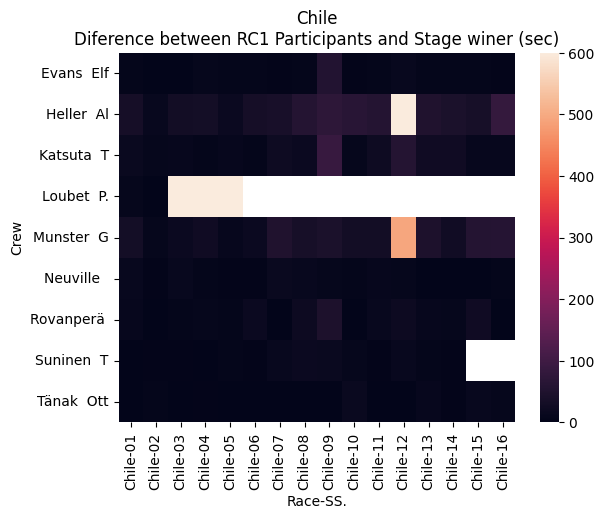

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")

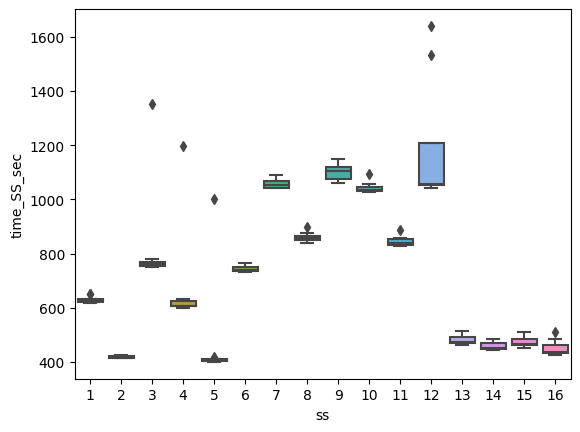

In [23]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
#plt.savefig("Boxplot__" + Group + ".png")

Text(0.5, 1.0, 'Chile\nDiference between RC1 Participants and Stage winer (%)')

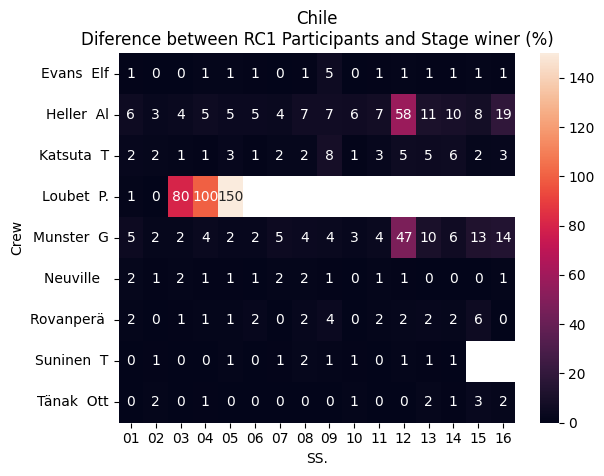

In [24]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff_Gr%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Stage winer (%)')
#plt.savefig( Group + ".jpg")